In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['PM1y1', 'NOy1', 'NO2y1', 'NOxy1','RHy1', 'WDy1','BPy1','PM1y2', 'NOy2', 'NO2y2', 'NOxy2','RHy2', 'WDy2','BPy2','PM1y3', 'NOy3', 'NO2y3', 'NOxy3','RHy3', 'WDy3','BPy3','year', 'month', 'day']]
Y1 = df['Ozone']

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=10)

In [27]:
grad_boost = GradientBoostingRegressor(n_estimators=2000,
                                      max_depth=8,
                                      max_features='sqrt',
                                      min_samples_split=4,
                                      min_samples_leaf=5,
                                      learning_rate=0.001)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.001, max_depth=8, max_features='sqrt',
                          min_samples_leaf=5, min_samples_split=4,
                          n_estimators=2000)

In [28]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.8961336896125127

Score on test data: 0.7222563592072395

Root Mean Squared Error: 10.872462050336823

Overall model accuracy: 0.7222563592072395


In [29]:
test=data.loc['207':'259']
X=test[['PM1y1', 'NOy1', 'NO2y1', 'NOxy1','RHy1', 'WDy1','BPy1','PM1y2', 'NOy2', 'NO2y2', 'NOxy2','RHy2', 'WDy2','BPy2','PM1y3', 'NOy3', 'NO2y3', 'NOxy3','RHy3', 'WDy3','BPy3','year', 'month', 'day']]
X

,PM1y1,NOy1,NO2y1,NOxy1,RHy1,WDy1,BPy1,PM1y2,NOy2,NO2y2,...,PM1y3,NOy3,NO2y3,NOxy3,RHy3,WDy3,BPy3,year,month,day
207,428.861429,125.535714,76.847143,144.901429,64.444286,201.848571,992.431429,371.975714,80.651429,81.828571,...,416.398571,100.627143,83.730000,212.015714,65.350000,219.218571,734.987143,2019,12,29
208,456.537143,109.870000,52.067143,117.267143,71.032857,190.068571,991.651429,452.655714,174.377143,78.085714,...,332.717143,98.832857,67.225714,194.864286,73.302857,194.622857,735.531429,2020,1,5
209,349.680000,84.832857,58.215714,100.144286,60.418571,195.667143,990.642857,344.172857,75.938571,86.725714,...,282.434286,101.944286,57.842857,190.755714,73.417143,178.474286,735.414286,2020,1,12
210,405.144286,117.140000,58.545714,126.631429,62.968571,191.431429,991.448571,405.398571,71.592857,79.045714,...,346.604286,94.412857,75.028571,195.770000,60.464286,224.265714,732.054286,2020,1,19
211,223.215604,34.865714,44.648571,52.171429,69.247143,183.401429,993.708571,302.185714,74.328571,68.768571,...,237.858571,49.015714,68.434286,127.910000,63.667143,205.961429,727.997143,2020,1,26
212,225.330769,47.905714,49.550000,65.417143,64.004286,199.584286,990.021429,284.925714,32.171429,40.208571,...,251.350000,74.012857,62.091429,156.391429,71.321429,201.948571,727.672857,2020,2,2
213,198.920769,65.595714,50.381429,80.275714,68.345714,181.917143,995.670000,331.052857,112.367143,104.145714,...,328.171429,153.021429,66.960000,268.622857,70.425714,192.517143,735.524286,2020,2,9
214,333.581429,73.142857,72.708571,98.288571,68.392857,188.734286,991.444286,204.577143,35.207143,61.682857,...,279.338571,50.672857,67.874286,129.678571,58.125714,216.392857,735.264286,2020,2,16
215,192.155714,68.825714,73.708571,96.087143,61.525714,181.485714,994.125714,330.682857,122.750000,91.308571,...,275.608571,34.234286,82.401429,120.168571,56.437143,232.758571,732.928571,2020,2,23
216,172.547857,86.743571,88.330000,117.698571,63.528571,180.118571,991.534286,228.510000,79.125714,77.098571,...,280.377143,38.925714,62.438571,108.778571,47.897143,234.928571,726.498571,2020,3,1


In [30]:
predict=grad_boost.predict(X)

In [31]:
predict

array([26.96367453, 30.5599753 , 31.16321639, 31.20294835, 32.43028455,
       31.64182403, 33.59975026, 35.52489495, 44.06474961, 44.58837054,
       43.4286488 , 49.21108091, 51.71711291, 52.42715059, 56.28796833,
       54.98384355, 59.12867841, 57.7223623 , 57.76496402, 57.36376882,
       57.96382176, 58.52885782, 58.79037885, 47.95056124, 53.51433389,
       55.11506521, 47.21092992, 35.09801885, 36.58708416, 32.6417785 ,
       31.20848492, 31.98709983, 35.87543605, 32.30603165, 32.89017043,
       33.11280516, 35.02434628, 33.66860414, 35.46295273, 36.05683636,
       41.87654815, 45.07202892, 48.56615456, 46.15490311, 42.37514645,
       37.38176535, 32.4566011 , 35.59324135, 40.6854058 , 32.01437302,
       38.17737934, 40.52174105, 42.84981857])

In [32]:
dates=data.loc['207':'259','From Date']

In [33]:
X['From Date']=dates.values

In [34]:
X.columns

Index(['PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'RHy1', 'WDy1', 'BPy1', 'PM1y2',
       'NOy2', 'NO2y2', 'NOxy2', 'RHy2', 'WDy2', 'BPy2', 'PM1y3', 'NOy3',
       'NO2y3', 'NOxy3', 'RHy3', 'WDy3', 'BPy3', 'year', 'month', 'day',
       'From Date'],
      dtype='object')

In [35]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [36]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [37]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [38]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

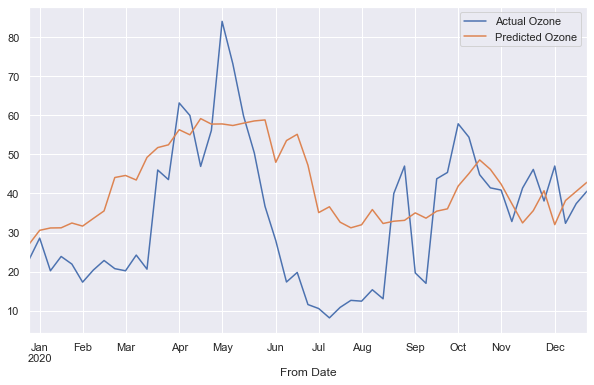

In [39]:
test['Ozone'].plot(legend=True, label='Actual Ozone', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted Ozone')

In [40]:
np.sqrt(mean_squared_error(test['Ozone'],X['pred']))

16.48598380531232

In [41]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 9.166456799996714
MSE: 118.2104310360144
RMSE: 10.872462050336823
R-Squared: 0.7222563592072395


In [42]:
mae = metrics.mean_absolute_error(test['Ozone'],X['pred'])
mse = metrics.mean_squared_error(test['Ozone'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['Ozone'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 13.643770538870072
MSE: 271.78766202902005
RMSE: 16.48598380531232
R-Squared: 0.11292039483384386


In [43]:
import pickle
filename = 'Ozone_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [44]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.7222563592072395


# 3rd plot

In [45]:
testcase = pd.DataFrame()

In [46]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [47]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [48]:
testcase

,test,pred,Corrected
58,40.731429,40.768891,29.896429
63,67.400000,57.697191,68.569653
35,13.240000,27.488662,16.616200
19,92.052857,76.532136,87.404598
59,52.620000,39.983414,50.855876
56,28.347143,35.866089,24.993627
83,20.480000,30.480374,19.607912
105,33.828571,30.765627,41.638089
121,66.691429,63.090608,73.963070
76,22.684286,39.491884,28.619422


In [49]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [50]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.9026167597805955

In [51]:
test2020=pd.DataFrame()

In [52]:
test2020['test']=test['Ozone']
test2020['pred']=X['pred']

In [53]:
test2020.index=test.index

In [54]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

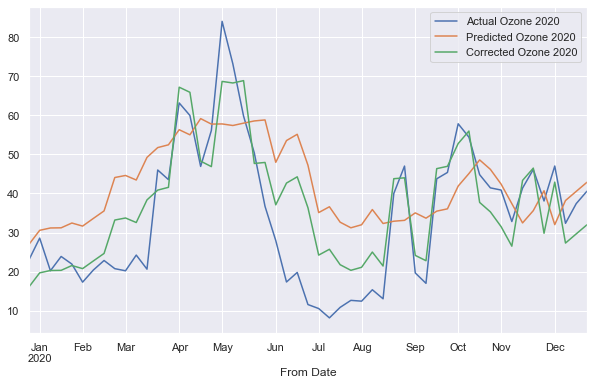

In [55]:
test2020['test'].plot(legend=True, label='Actual Ozone 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted Ozone 2020')
test2020["Corrected"].plot(legend=True, label='Corrected Ozone 2020')

In [56]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.5392093375779825